## Data Visualization

### Import libraries

In [16]:
import os
import sqlite3
import pandas as pd
from sqlite3 import Error
import matplotlib.pyplot as plt
import seaborn as sns
#import cufflinks as cf
#from IPython.display import display
#import plotly.io as pio
#from plotly.offline import iplot, init_notebook_mode, plot, download_plotlyjs

%matplotlib inline
#init_notebook_mode(connected=True)
#cf.go_offline()
import matplotlib.style as style
style.use('ggplot')
style.use('seaborn-poster')
#sns.set_style('ggplot')
sns.set_context('talk')
#sns.set_palette(sns.color_palette("mako"))
#pio.renderers.default = "browser"

In [2]:
def create_connection(db_file, delete_db=False):
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        conn.execute("PRAGMA foreign_keys = 1")
    except Error as e:
        print(e)

    return conn

In [3]:
def execute_sql_statement(sql_statement, conn):
    cur = conn.cursor()
    cur.execute(sql_statement)

    rows = cur.fetchall()

    return rows

#### Creating connection to the database.

In [4]:
PATH = os.getcwd()
conn = create_connection(os.path.join(PATH,"nyc-payroll.db"))

### Visualize categories

In [5]:
with conn:
    sql = "select RegularHoursCategory, OTHoursCategory, HourlyPayCategory, TotalPayCategory from Income;"
    df = pd.read_sql_query(sql, conn)

##### Visualize Regular Hours Category.

'\ntemp.iplot(kind=\'bar\', x="Count", y="RegularHoursCategory",color=\'red\', title=\'Regular Hours of employees\', \n           xTitle=\'Count\', yTitle=\'Category\', orientation=\'h\')'

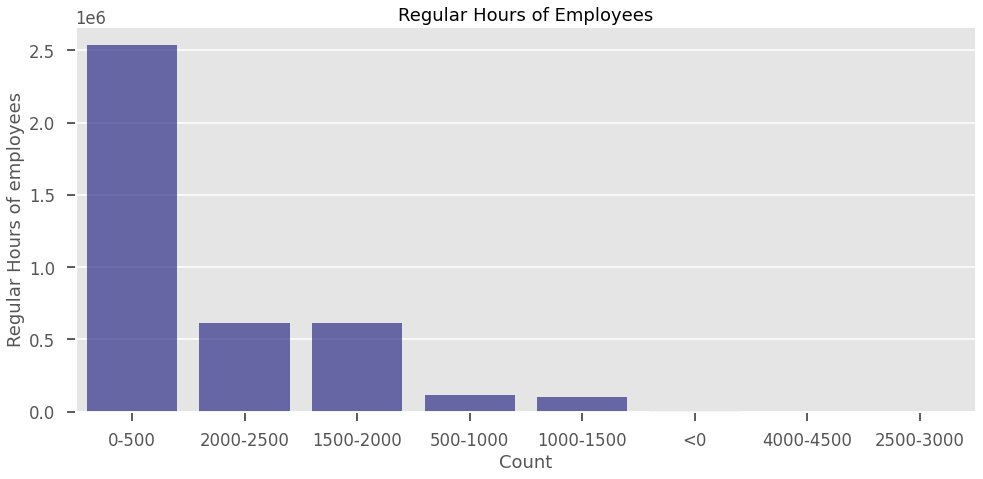

In [26]:
temp = pd.DataFrame(df['RegularHoursCategory'].value_counts().reset_index()).rename(columns={"index":"Count"})
plt.figure(figsize=(14,7))
sns.barplot(data=temp, x='Count',y='RegularHoursCategory', alpha=0.6, color='darkblue')
plt.xlabel("Count")
plt.ylabel("Regular Hours of employees")
plt.title("Regular Hours of Employees")
plt.tight_layout()

"""
temp.iplot(kind='bar', x="Count", y="RegularHoursCategory",color='red', title='Regular Hours of employees', 
           xTitle='Count', yTitle='Category', orientation='h')"""

##### Visualize Over Time Hours category

In [ ]:
temp = pd.DataFrame(df['OTHoursCategory'].value_counts().reset_index()).rename(columns={"index":"Count"})

"""
temp.iplot(kind='bar', x="Count", y="OTHoursCategory",color='blue', title='Over Time Hours of employees',
           xTitle='Count', yTitle='Category', orientation='h')"""

##### Visualize Total Pay category.

In [ ]:
temp = pd.DataFrame(df['TotalPayCategory'].value_counts().reset_index()).rename(columns={"index":"Count"})
"""
temp.iplot(kind='bar', x="Count", y="TotalPayCategory",color='purple', title='Total Pay of employees',
           xTitle='Count', yTitle='Category', orientation='h') """

##### Visualize Hourly Pay category

In [ ]:
temp = pd.DataFrame(df['HourlyPayCategory'].value_counts().reset_index()).rename(columns={"index":"Count"})
"""
temp.iplot(kind='bar', x="Count", y="HourlyPayCategory",color='green', title='Hourly Pay of employees',
           xTitle='Count', yTitle='Category', orientation='h')"""